## Note
This is the main file. This notebook contains all the models which were created in other notebooks. I was note able to complete all the code in a single notebook because of hardware requirements. Please have a look at other notebooks too for more details. Please read ReadMe file before looking at any notebook, from that you will have a good idea what that notebook does.

## Importing Relevant Libraries

In [1]:
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

import numpy as np


from sklearn.cross_validation import train_test_split

from numpy import newaxis

from sklearn.metrics import accuracy_score

Using TensorFlow backend.
/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from keras.models import load_model

In [3]:
!pip install seaborn

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Benchmark or Baseline Model
Loading a benchmark or baseline model which was already created in convent notebook. This model is very shallow and just has 4 convolution layers.

In [5]:
data = np.load("./data/new_testing_data.npy")


## Data Preprocessing and Reshaping
X = [x[0]/255 for x in data]
y = [1 if y[1][0] == 1 else 0 for y in data]

X_cnn = [x[:,:,newaxis] for x in X]
X_cnn= np.array(X_cnn)
y = np.array(y)

In [6]:
baseline_model = load_model("saved_models/baseline/baseline_cnn_2_layers.h5")

In [7]:
baseline_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 224, 224, 32)  320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 224, 224, 32)  9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 112, 112, 32)  0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 112, 112, 64)  18496       maxpooling2d_1[0][0]             
___________________________________________________________________________________________

### Loading already created loss values array for plotting

In [8]:
baseline_model_losses = np.load("saved_models/baseline/baseline_losses.npy")
baseline_model_val_losses = np.load("saved_models/baseline/baseline_val_losses.npy")

In [9]:
baseline_model_losses

array([ 4.72422602,  4.14005571,  3.85339679,  3.81968495,  3.7963979 ,
        3.70463724,  3.72759589,  3.31234494,  2.92351709,  2.87536567])

In [10]:
baseline_model_val_losses

array([ 2.46209197,  2.46209197,  2.46209197,  2.46209197,  2.46209197,
        2.46209197,  2.46209197,  2.46209197,  2.46209197,  2.46209197])

In [12]:
baseline_model_predictions = baseline_model.predict_classes(X_cnn, verbose=2)

In [14]:
accuracy = accuracy_score(y, baseline_model_predictions)

In [15]:
print("The accuracy of baseline model is : " + str(accuracy))

The accuracy of baseline model is : 0.84816


/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


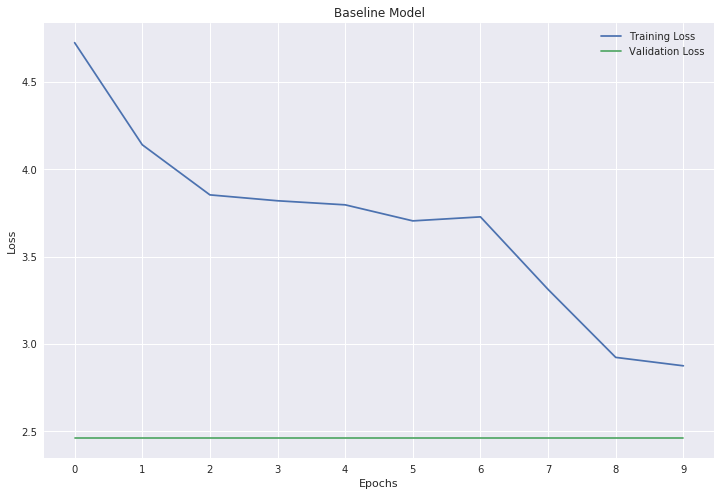

In [106]:
plt.figure(figsize=(12,8))
plt.plot(range(len(baseline_model_losses)), baseline_model_losses, label="Training Loss")
plt.plot(range(len(baseline_model_val_losses)), baseline_model_val_losses, label="Validation Loss")
plt.legend()
plt.title("Baseline Model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(len(baseline_model_val_losses)))
plt.savefig("./figs/baseline_loss.jpg")
plt.show()

## CNN implemented on  Grayscale Images With Adam Optimizer
The models loaded in this section take grayscale images (1 channel) as a input and uses Adam optimizer with learning rate of 1e-3. All the models loaded in this section were created in total_grayscale notebook.

In [16]:
grayscale_10_layer_model_adam = load_model("saved_models/adam/10_layers_gray/grayscale_cnn_10_layers.h5")

In [17]:
grayscale_10_layer_model_adam.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 224, 224, 32)  320         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 224, 224, 32)  9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 112, 112, 32)  0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 112, 112, 64)  18496       maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [19]:
grayscale_10_layer_model_predictions_adam = grayscale_10_layer_model_adam.predict_classes(X_cnn, verbose=2)
gray_10_accuracy_adam = accuracy_score(y, grayscale_10_layer_model_predictions_adam)

In [20]:
print("The accuracy of 10 Layer CNN model with grayscale data is : " + str(gray_10_accuracy_adam))

The accuracy of 10 Layer CNN model with grayscale data is : 0.84816


In [57]:
gray_10_layer_losses_adam = np.load("saved_models/adam/10_layers_gray/grayscale_cnn_10_layers_losses.npy")
gray_10_layer_val_losses_adam = np.load("saved_models/adam/10_layers_gray/grayscale_cnn_10_layers_val_losses.npy")

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


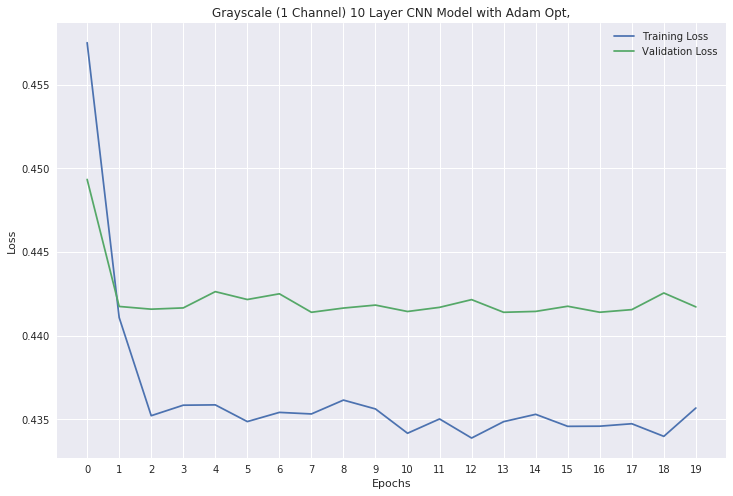

In [125]:
plt.figure(figsize=(12,8))
plt.plot(range(len(gray_10_layer_losses_adam)), gray_10_layer_losses_adam, label="Training Loss")
plt.plot(range(len(gray_10_layer_val_losses_adam)), gray_10_layer_val_losses_adam, label="Validation Loss")
plt.legend()
plt.title("Grayscale (1 Channel) 10 Layer CNN Model with Adam Opt,")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(len(gray_10_layer_val_losses_adam)))
plt.savefig("./figs/gray_10_adam.jpg")
plt.show()

In [21]:
grayscale_13_layer_model_adam = load_model("saved_models/adam/13_layer_gray/grayscale_cnn_13_layers.h5")

In [22]:
grayscale_13_layer_model_adam.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_8 (Convolution2D)  (None, 224, 224, 32)  320         convolution2d_input_3[0][0]      
____________________________________________________________________________________________________
convolution2d_9 (Convolution2D)  (None, 224, 224, 32)  9248        convolution2d_8[0][0]            
____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 112, 112, 32)  0           convolution2d_9[0][0]            
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 112, 112, 64)  18496       maxpooling2d_4[0][0]             
___________________________________________________________________________________________

In [23]:
grayscale_13_layer_model_predictions_adam = grayscale_13_layer_model_adam.predict_classes(X_cnn, verbose=2)
gray_13_accuracy_adam = accuracy_score(y, grayscale_13_layer_model_predictions_adam)

In [25]:
print("The accuracy of 13 Layer CNN model with grayscale data is : " + str(gray_13_accuracy_adam))

The accuracy of 13 Layer CNN model with grayscale data is : 0.84816


In [58]:
gray_13_layer_losses_adam = np.load("saved_models/adam/13_layer_gray/grayscale_cnn_13_layers_losses.npy")
gray_13_layer_val_losses_adam = np.load("saved_models/adam/13_layer_gray/grayscale_cnn_13_layers_val_losses.npy")

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


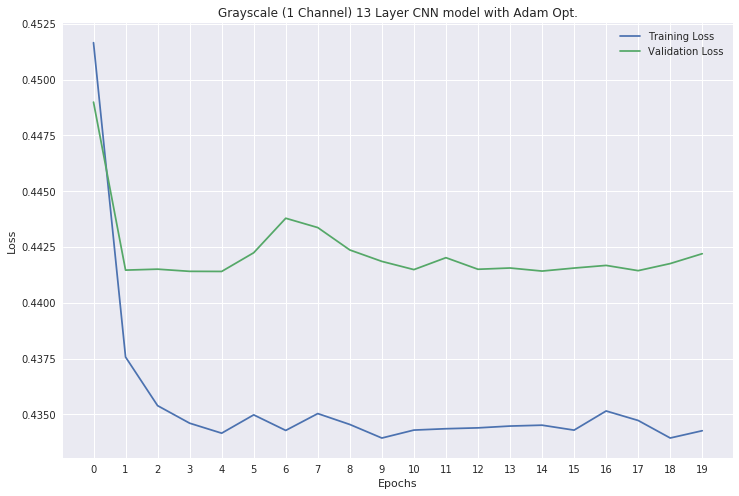

In [126]:
plt.figure(figsize=(12,8))
plt.plot(range(len(gray_13_layer_losses_adam)), gray_13_layer_losses_adam, label="Training Loss")
plt.plot(range(len(gray_13_layer_val_losses_adam)), gray_13_layer_val_losses_adam, label="Validation Loss")
plt.legend()
plt.title("Grayscale (1 Channel) 13 Layer CNN model with Adam Opt.")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(len(gray_13_layer_losses_adam)))
plt.savefig("./figs/gray_13_adam.jpg")
plt.show()

## CNN implemented on RGB images with Adam Optimizer
This section loads the model created in total_color notebook. These model takes a color or RGB image (3 channel) as input and use adam optimizer with 1e-3 learning rate.

In [26]:
color_data = np.load("./data/new_testing_color_data.npy")

In [27]:
X = [x[0]/255.0 for x in color_data]
y = [1 if y[1][0] == 1 else 0 for y in color_data]

In [30]:
color_10_layer_model_adam = load_model("saved_models/adam/10_layer_color/color_cnn_10_layers.h5")

In [31]:
color_10_layer_model_adam.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 224, 224, 32)  896         convolution2d_input_5[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 224, 224, 32)  9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 112, 112, 32)  0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 112, 112, 64)  18496       maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [32]:
X = np.array(X)

In [33]:
color_10_layer_model_predictions_adam = color_10_layer_model_adam.predict_classes(X, verbose=2)

In [37]:
color_10_accuracy_adam = accuracy_score(y, color_10_layer_model_predictions_adam)

In [38]:
print("The accuracy of 10 Layer CNN model with RGB (3 channels) data is : " + str(color_10_accuracy_adam))

The accuracy of 10 Layer CNN model with RGB (3 channels) data is : 0.51008


In [39]:
color_10_layer_losses_adam = np.load("saved_models/adam/10_layer_color/color_cnn_10_layers_losses.npy")
color_10_layer_val_losses_adam = np.load("saved_models/adam/10_layer_color/color_cnn_10_layers_val_losses.npy")

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


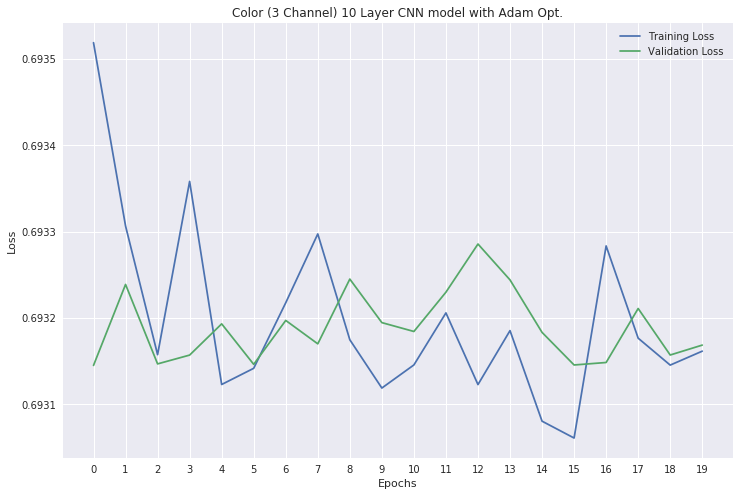

In [127]:
plt.figure(figsize=(12,8))
plt.plot(range(len(color_10_layer_losses_adam)), color_10_layer_losses_adam, label="Training Loss")
plt.plot(range(len(color_10_layer_val_losses_adam)), color_10_layer_val_losses_adam, label="Validation Loss")
plt.legend()
plt.title("Color (3 Channel) 10 Layer CNN model with Adam Opt.")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(len(color_10_layer_losses_adam)))
plt.savefig("./figs/color_10_adam.jpg")
plt.show()

In [40]:
color_13_layer_model_adam = load_model("saved_models/adam/13_layer_color/color_cnn_13_layers.h5")

In [41]:
color_13_layer_model_adam.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_8 (Convolution2D)  (None, 224, 224, 32)  896         convolution2d_input_6[0][0]      
____________________________________________________________________________________________________
convolution2d_9 (Convolution2D)  (None, 224, 224, 32)  9248        convolution2d_8[0][0]            
____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 112, 112, 32)  0           convolution2d_9[0][0]            
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 112, 112, 64)  18496       maxpooling2d_4[0][0]             
___________________________________________________________________________________________

In [42]:
color_13_layer_model_predictions_adam = color_13_layer_model_adam.predict_classes(X, verbose=2)
color_13_accuracy_adam = accuracy_score(y, color_13_layer_model_predictions_adam)

In [22]:
print("The accuracy of 13 Layer CNN model with RGB (3 channels) data is : " + str(color_13_accuracy_adam))

The accuracy of 13 Layer CNN model with RGB (3 channels) data is : 0.50016


In [43]:
color_13_layer_losses_adam = np.load("saved_models/adam/13_layer_color/color_cnn_13_layers_losses.npy")
color_13_layer_val_losses_adam = np.load("saved_models/adam/13_layer_color/color_cnn_13_layers_val_losses.npy")

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


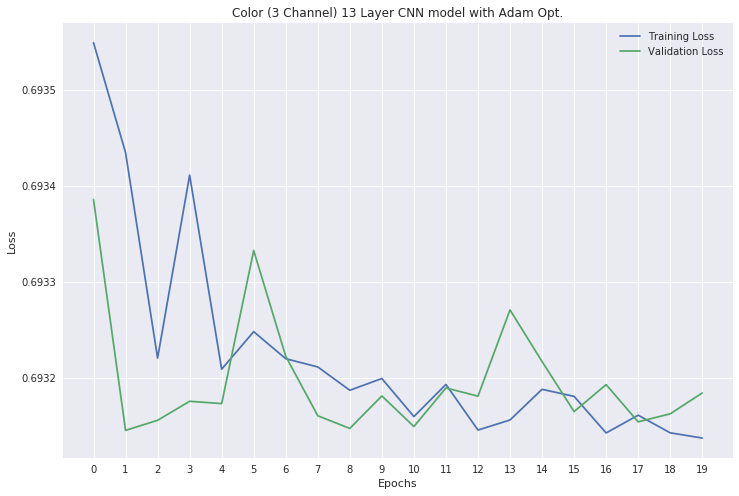

In [128]:
plt.figure(figsize=(12,8))
plt.plot(range(len(color_13_layer_losses_adam)), color_13_layer_losses_adam, label="Training Loss")
plt.plot(range(len(color_13_layer_val_losses_adam)), color_13_layer_val_losses_adam, label="Validation Loss")
plt.legend()
plt.title("Color (3 Channel) 13 Layer CNN model with Adam Opt.")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(len(color_13_layer_losses_adam)))
plt.savefig("./figs/color_13_adam.jpg")
plt.show()

## CNN Implemented on Grayscale data with RMSProp Optimizer

In [46]:
grayscale_10_layer_model_rms = load_model("saved_models/rms_prop/10_layer_grayscale/grayscale_cnn_10_layers.h5")

In [47]:
grayscale_10_layer_model_predictions_rms = grayscale_10_layer_model_rms.predict_classes(X_cnn, verbose=2)
gray_10_accuracy_rms = accuracy_score(y, grayscale_10_layer_model_predictions_rms)

In [48]:
print("The accuracy of 10 Layer CNN model on grayscale data with RMSprop optimizer is : " + str(gray_10_accuracy_rms))

The accuracy of 10 Layer CNN model on grayscale data with RMSprop optimizer is : 0.51008


In [69]:
grayscale_10_layer_losses_rms = np.load("saved_models/rms_prop/10_layer_grayscale/grayscale_cnn_10_layers_losses.npy")
grayscale_10_layer_val_losses_rms = np.load("saved_models/rms_prop/10_layer_grayscale/grayscale_cnn_10_layers_val_losses.npy")

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


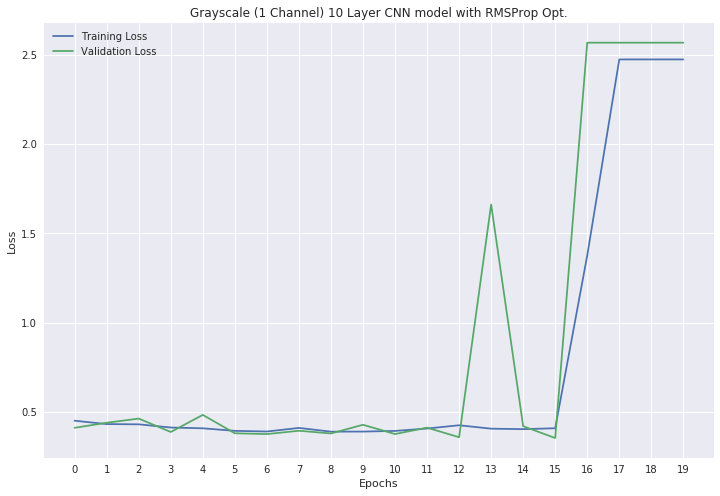

In [129]:
plt.figure(figsize=(12,8))
plt.plot(range(len(grayscale_10_layer_losses_rms)), grayscale_10_layer_losses_rms, label="Training Loss")
plt.plot(range(len(grayscale_10_layer_val_losses_rms)), grayscale_10_layer_val_losses_rms, label="Validation Loss")
plt.legend()
plt.title("Grayscale (1 Channel) 10 Layer CNN model with RMSProp Opt.")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(len(grayscale_10_layer_losses_rms)))
plt.savefig("./figs/gray_10_rms.jpg")
plt.show()

## CNN implemented on RGB images with RMSProp Optimizer
This section loads the model created in total_color notebook. These model takes a color or RGB image (3 channel) as input and use RMSProp optimizer with 1e-4 learning rate.

In [49]:
color_10_layer_model_rms = load_model("saved_models/rms_prop/10_layer_color/color_cnn_10_layers.h5")

In [50]:
color_10_layer_model_predictions_rms = color_10_layer_model_rms.predict_classes(X, verbose=2)

In [51]:
color_10_accuracy_rms = accuracy_score(y, color_10_layer_model_predictions_rms)

In [52]:
print("The accuracy of 10 Layer CNN model with RGB (3 channels) data is : " + str(color_10_accuracy_rms))

The accuracy of 10 Layer CNN model with RGB (3 channels) data is : 0.90448


In [71]:
color_10_layer_losses_rms = np.load("saved_models/rms_prop/10_layer_color/color_cnn_10_layers_losses.npy")
color_10_layer_val_losses_rms = np.load("saved_models/rms_prop/10_layer_color/color_cnn_10_layers_val_losses.npy")

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


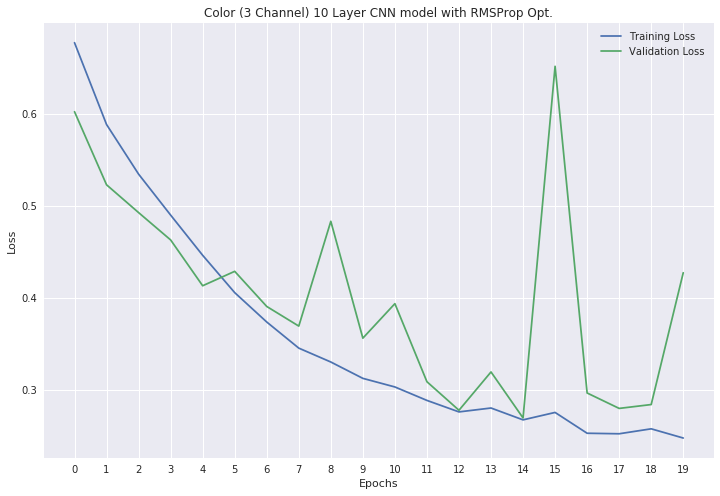

In [131]:
plt.figure(figsize=(12,8))
plt.plot(range(len(color_10_layer_losses_rms)), color_10_layer_losses_rms, label="Training Loss")
plt.plot(range(len(color_10_layer_val_losses_rms)), color_10_layer_val_losses_rms, label="Validation Loss")
plt.legend()
plt.title("Color (3 Channel) 10 Layer CNN model with RMSProp Opt.")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(len(color_10_layer_losses_rms)))
plt.savefig("./figs/color_10_rms.jpg")
plt.show()

In [53]:
color_13_layer_model_rms = load_model("saved_models/rms_prop/13_layer_color/color_cnn_13_layers.h5")

In [54]:
color_13_layer_model_predictions_rms = color_13_layer_model_rms.predict_classes(X, verbose=2)
color_13_accuracy_rms = accuracy_score(y, color_13_layer_model_predictions_rms)

In [55]:
print("The accuracy of 13 Layer CNN model with RGB (3 channels) data is : " + str(color_13_accuracy_rms))

The accuracy of 13 Layer CNN model with RGB (3 channels) data is : 0.94384


In [73]:
color_13_layer_losses_rms = np.load("saved_models/rms_prop/13_layer_color/color_cnn_13_layers_losses.npy")
color_13_layer_val_losses_rms = np.load("saved_models/rms_prop/13_layer_color/color_cnn_13_layers_val_losses.npy")

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


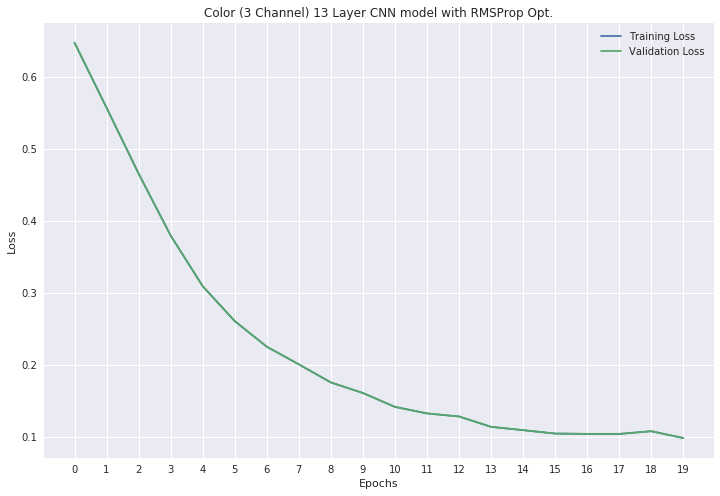

In [132]:
plt.figure(figsize=(12,8))
plt.plot(range(len(color_13_layer_losses_rms)), color_13_layer_losses_rms, label="Training Loss")
plt.plot(range(len(color_13_layer_losses_rms)), color_13_layer_losses_rms, label="Validation Loss")
plt.legend()
plt.title("Color (3 Channel) 13 Layer CNN model with RMSProp Opt.")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(range(len(color_13_layer_losses_rms)))
plt.savefig("./figs/color_13_rms.jpg")
plt.show()

In [87]:
accuracies_on_grayscale_with_adam = [accuracy, gray_10_accuracy_adam, gray_13_accuracy_adam]
accuracies_on_color_with_adam = [accuracy, color_10_accuracy_adam, color_13_accuracy_adam]

In [88]:
accuracies_on_grayscale_with_rms = [accuracy, gray_10_accuracy_rms]
accuracies_on_color_with_rms = [accuracy, color_10_accuracy_rms, color_13_accuracy_rms]

In [89]:
len(accuracies_on_grayscale_with_adam)

3

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


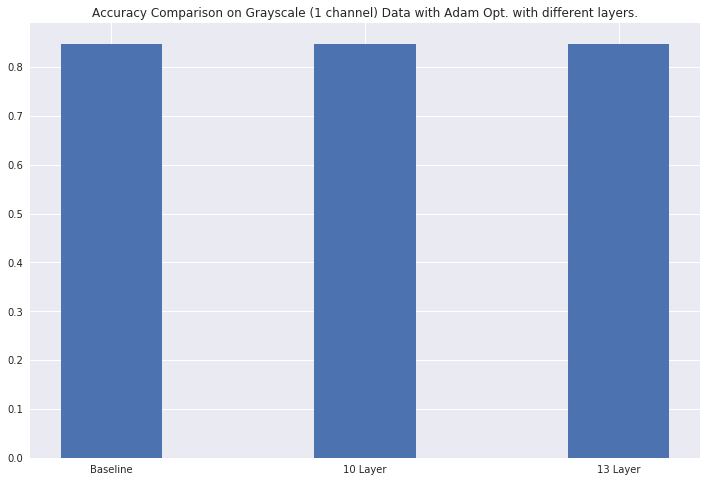

In [119]:
plt.figure(figsize=(12,8))
plt.title("Accuracy Comparison on Grayscale (1 channel) Data with Adam Opt. with different layers.")
plt.bar(range(len(accuracies_on_grayscale_with_adam)), accuracies_on_grayscale_with_adam, width=0.4)
plt.xticks(range(len(accuracies_on_grayscale_with_adam)), ["Baseline","10 Layer", "13 Layer"])
plt.savefig("./figs/acc_gray_adam.jpg")
plt.show()

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


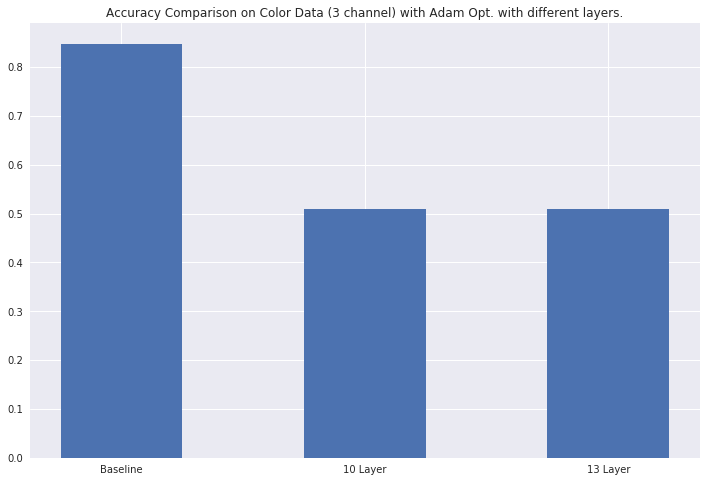

In [120]:
plt.figure(figsize=(12,8))
plt.title("Accuracy Comparison on Color Data (3 channel) with Adam Opt. with different layers.")
plt.bar(range(len(accuracies_on_color_with_adam)), accuracies_on_color_with_adam, width=0.5)
plt.xticks(range(len(accuracies_on_color_with_adam)), ["Baseline","10 Layer", "13 Layer"])
plt.savefig("./figs/acc_color_adam.jpg")
plt.show()

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


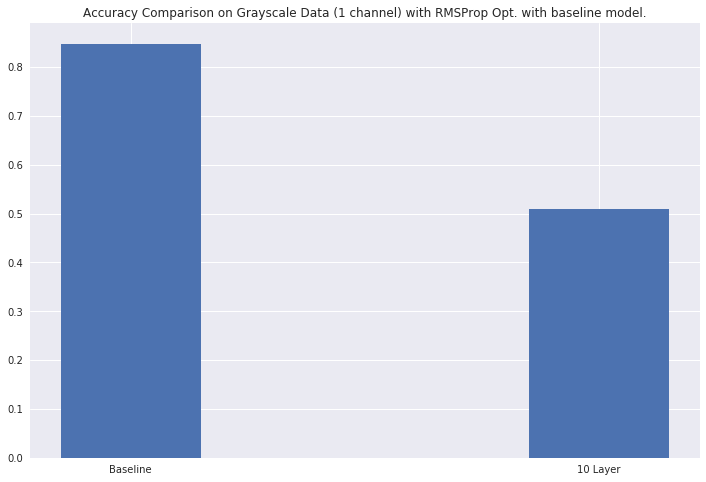

In [123]:
plt.figure(figsize=(12,8))
plt.title("Accuracy Comparison on Grayscale Data (1 channel) with RMSProp Opt. with baseline model.")
plt.bar(range(len(accuracies_on_grayscale_with_rms)), accuracies_on_grayscale_with_rms, width=0.3)
plt.xticks(range(len(accuracies_on_grayscale_with_rms)), ["Baseline","10 Layer"])
plt.savefig("./figs/acc_gray_rms.jpg")
plt.show()

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


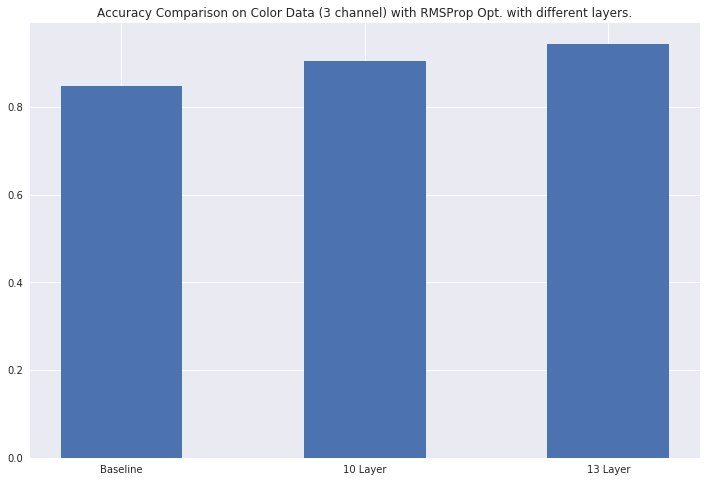

In [124]:
plt.figure(figsize=(12,8))
plt.title("Accuracy Comparison on Color Data (3 channel) with RMSProp Opt. with different layers.")
plt.bar(range(len(accuracies_on_color_with_rms)), accuracies_on_color_with_rms, width=0.5)
plt.xticks(range(len(accuracies_on_color_with_rms)), ["Baseline","10 Layer", "13 Layer"])
plt.savefig("./figs/acc_color_rms.jpg")
plt.show()